In [1]:
# General import
import numpy as np
import os
from PIL import Image
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataLoader, Blurr, Add_noise
from Codes.alternate import AlternatingBD
from Codes.display import Display_ker
from Codes.display import Display_im

# Minimisation alternée

Approche variationnelle pour la reconstruction d'un noyau régulier $K$, minimisation de l'énergie,
$$
E_1(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2
\; .
$$ 
On peut considérer que le noyau appartien a l'ensemble des simplexe (ensemble des noyaux à coefficient positif dont la somme vaut 1).
On sonsidere alors l'énergie
$$
E_1'(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2 + \Sigma(K)
\; .
$$ 


Approche variationnelle pour la reconstruction de l'image $u$, avec régularisation TV,
$$
E_2(u) = \frac{1}{2} \| g - K * u\|^2 +  \mu \text{TV} (u)
\; .
$$

Dans la minimisation alternée, on considere d'abord la minimisation de $E_2$ 
pour reconstruire l'image $u$, puis de $E_1$ (ou éventuellement $E_1'$) pour reconstruire le noyau $K$.

In [2]:
file_name = 'Images'
im_name   = 'image01.png'
x_i = DataLoader(file_name,im_name)
x_i = x_i/np.amax(x_i)# Rescaling

In [3]:
M         = 20
Nx, Ny    = np.meshgrid(np.linspace(-1,1,2*M), np.linspace(-1,1,2*M))
d         = np.sqrt(Nx*Nx+Ny*Ny)
sigma,moy = 0.2, 0.0
K         = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K         = K/K.sum() # Simplex

In [4]:
x_b  = Blurr(x_i,K)
x_o1 = Add_noise(x_b)

In [15]:
Display_im(x_o1,x)

NameError: name 'Display_im' is not defined

### Initialisation juste - bruit 1%

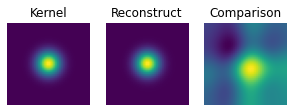

Erreur |K_pred - K_true|_2 : 0.003914906688918143


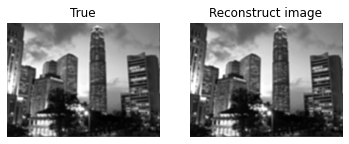

Erreur |x_pred - x_true|_2 : 0.007008876396373852


In [5]:
alpha = 0.1
mu    = 0.05
K_in   = K.copy()
x_in  = x_o1
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=False)

Text(0.5, 1.0, 'Initialisation juste, bruit 0.01')

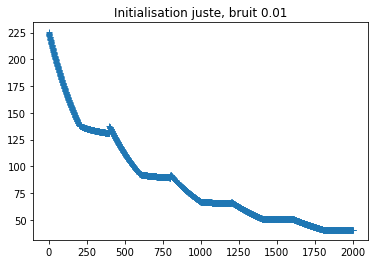

In [6]:
plt.plot(Etot,'+')
plt.title("Initialisation juste, bruit 0.01")

### Initialisation noyau proche - pas de bruit

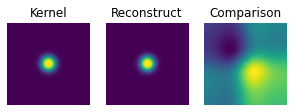

Erreur |K_pred - K_true|_2 : 0.0016541373022450584


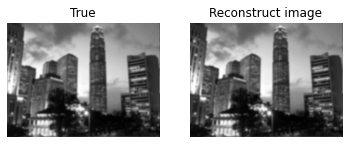

Erreur |x_pred - x_true|_2 : 0.00433900092054772


In [7]:
alpha     = 0.05
mu        = 0.005
sigma,moy = 0.1, 0.05
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_b,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=False)

Text(0.5, 1.0, 'Initialisation proche, pas de bruit')

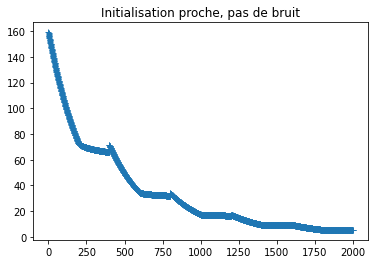

In [8]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, pas de bruit")

### Initialisation proche - bruit 1%

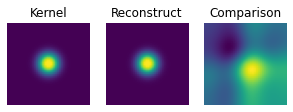

Erreur |K_pred - K_true|_2 : 0.0027822334263556485


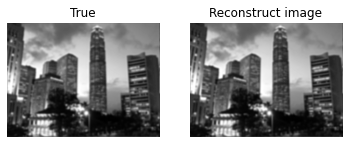

Erreur |x_pred - x_true|_2 : 0.005954288650843136


In [9]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.15, 0.05
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=False)

Text(0.5, 1.0, 'Initialisation proche, bruit 0.01')

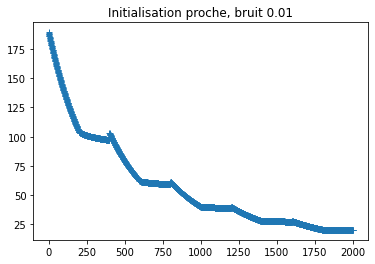

In [10]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01")

### Initialisation proche - bruit 1% - projection sur le simplex

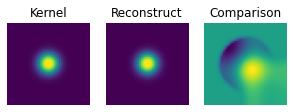

Erreur |K_pred - K_true|_2 : 0.002058849717025552


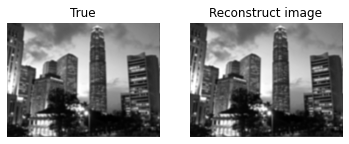

Erreur |x_pred - x_true|_2 : 0.005989774517731099


In [11]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.15, 0.05
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=True)

Text(0.5, 1.0, 'Initialisation proche, bruit 0.01, proj sur simplex')

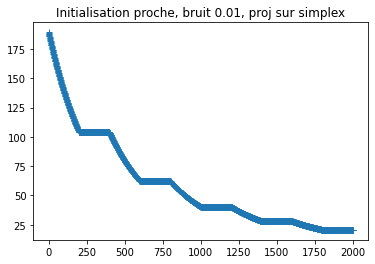

In [12]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01, proj sur simplex")

### Initialisation lointaine, bruit 1%, proj sur simplex

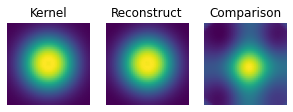

Erreur |K_pred - K_true|_2 : 0.02741116922632089


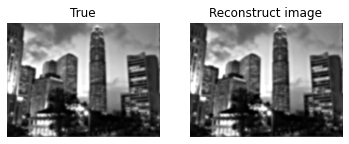

Erreur |x_pred - x_true|_2 : 0.01051826251299702


In [13]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.4, 0.1
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=True)

Text(0.5, 1.0, 'Initialisation proche, bruit 0.01, proj sur simplex')

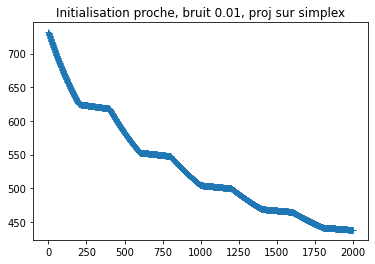

In [14]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01, proj sur simplex")